In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset/PatientSurvival Prediction/dataset.csv')
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [3]:
df["hospital_death"].unique()

array([0, 1])

In [4]:
df["Unnamed: 83"].unique()

array([nan])

In [5]:
df.drop(columns =["Unnamed: 83"], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
age                            4228
bmi                            3429
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 84, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56935 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   56935 non-null  int64  
 1   patient_id                     56935 non-null  int64  
 2   hospital_id                    56935 non-null  int64  
 3   age                            56935 non-null  float64
 4   bmi                            56935 non-null  float64
 5   elective_surgery               56935 non-null  int64  
 6   ethnicity                      56935 non-null  object 
 7   gender                         56935 non-null  object 
 8   height                         56935 non-null  float64
 9   icu_admit_source               56935 non-null  object 
 10  icu_id                         56935 non-null  int64  
 11  icu_stay_type                  56935 non-null  object 
 12  icu_type                       56935 non-null 

In [9]:
le = preprocessing.LabelEncoder()

for col in list(df.columns):
    if df[col].dtype == object:
        print("Column Name: \t\t", col)
        print("Unique Values: \t\t", list(df[col].unique()) )
        print("Length: \t\t", len(df[col].unique()))
        
        choice = 1
        
        if choice == 1:
            df[col]= le.fit_transform(df[col])
            print("Encoding Done Sucessfully :) ")
        else:
            print("Encoding Rejected :( ")
        print()

Column Name: 		 ethnicity
Unique Values: 		 ['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']
Length: 		 6
Encoding Done Sucessfully :) 

Column Name: 		 gender
Unique Values: 		 ['M', 'F']
Length: 		 2
Encoding Done Sucessfully :) 

Column Name: 		 icu_admit_source
Unique Values: 		 ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU']
Length: 		 5
Encoding Done Sucessfully :) 

Column Name: 		 icu_stay_type
Unique Values: 		 ['admit', 'readmit', 'transfer']
Length: 		 3
Encoding Done Sucessfully :) 

Column Name: 		 icu_type
Unique Values: 		 ['CTICU', 'Med-Surg ICU', 'Neuro ICU', 'MICU', 'CCU-CTICU', 'SICU', 'Cardiac ICU', 'CSICU']
Length: 		 8
Encoding Done Sucessfully :) 

Column Name: 		 apache_3j_bodysystem
Unique Values: 		 ['Sepsis', 'Respiratory', 'Neurological', 'Cardiovascular', 'Gastrointestinal', 'Trauma', 'Metabolic', 'Hematological', 'Musculoskeletal/Skin', 'Genitourinary', 'Gynecological']

In [10]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,2,1,180.3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,114252,59342,81,77.0,27.420000,0,2,0,160.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
5,33181,74489,83,67.0,27.560000,0,2,1,190.5,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0
10,105427,125898,77,72.0,28.257052,1,3,0,154.9,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,6,0
17,22471,112115,118,46.0,25.845717,0,3,1,167.6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


In [11]:
len(df)

56935

In [12]:
X = df.drop("hospital_death", axis = 1)
y = df["hospital_death"]
p_values = f_regression(X,y)[1]
target_col = "hospital_death"

p_dict = {}

col = list(df.columns)
iter_df = 0

for value in p_values:
    if col[iter_df] == target_col:
        iter_df += 1
        
    p_dict[col[iter_df]] = value.round(3)
    iter_df += 1
    
p_dict

{'encounter_id': 0.521,
 'patient_id': 0.215,
 'hospital_id': 0.735,
 'age': 0.0,
 'bmi': 0.0,
 'elective_surgery': 0.0,
 'ethnicity': 0.214,
 'gender': 0.763,
 'height': 0.01,
 'icu_admit_source': 0.002,
 'icu_id': 0.005,
 'icu_stay_type': 0.281,
 'icu_type': 0.469,
 'pre_icu_los_days': 0.0,
 'weight': 0.0,
 'apache_2_diagnosis': 0.0,
 'apache_3j_diagnosis': 0.0,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'gcs_eyes_apache': 0.0,
 'gcs_motor_apache': 0.0,
 'gcs_unable_apache': nan,
 'gcs_verbal_apache': 0.0,
 'heart_rate_apache': 0.0,
 'intubated_apache': 0.0,
 'map_apache': 0.0,
 'resprate_apache': 0.0,
 'temp_apache': 0.0,
 'ventilated_apache': 0.0,
 'd1_diasbp_max': 0.004,
 'd1_diasbp_min': 0.0,
 'd1_diasbp_noninvasive_max': 0.004,
 'd1_diasbp_noninvasive_min': 0.0,
 'd1_heartrate_max': 0.0,
 'd1_heartrate_min': 0.025,
 'd1_mbp_max': 0.272,
 'd1_mbp_min': 0.0,
 'd1_mbp_noninvasive_max': 0.198,
 'd1_mbp_noninvasive_min': 0.0,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,

In [13]:
threshold = 0.2

del_col = []

for key in p_dict:
    val = p_dict[key]
    
    if val > threshold:
        del_col.append(key)
        
del_col

['encounter_id',
 'patient_id',
 'hospital_id',
 'ethnicity',
 'gender',
 'icu_stay_type',
 'icu_type',
 'd1_mbp_max']

In [14]:
df.drop(columns = del_col, axis = 1, inplace = True)
X = df.drop("hospital_death", axis = 1)
y = df["hospital_death"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [15]:
def model_testing(l_bound, u_bound, step):
    Logistic = []
    KNN = []
    RandomForest = []
    
    for nCom in range(l_bound, u_bound, step):
        print("Working on ", nCom, " Components...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        pca = PCA(n_components = nCom)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        
        model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
        
        Logistic.append(model_scores['Logistic Regression'])
        KNN.append(model_scores['KNN'])
        RandomForest.append(model_scores['Random Forest'])
        
    return (Logistic, KNN, RandomForest)
len(list(df.columns))

76

In [16]:
l_bound = 60  
u_bound  = 63

step = 1

Logistic, KNN , RandomForest = model_testing(l_bound, u_bound, step)

Working on  60  Components...
Working on  61  Components...
Working on  62  Components...


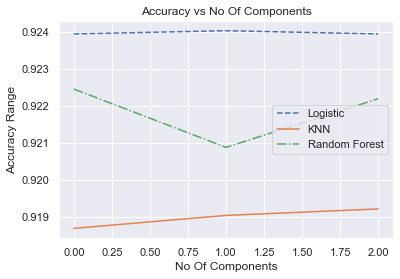

Index:
Logistic : 	 61
KNN : 		 62
Random Forest :  60

Max Accuracy :
Logistic : 	 0.9240361816106086
KNN : 		 0.9192061122332484
Random Forest :  0.9224554316325635



In [17]:
plt.plot(Logistic, label = "Logistic", linestyle = "--")
plt.plot(KNN, label = "KNN", linestyle = "-")
plt.plot(RandomForest, label = "Random Forest", linestyle = '-.')
plt.legend()
plt.title("Accuracy vs No Of Components")
plt.xlabel("No Of Components")
plt.ylabel("Accuracy Range")
plt.show()

print("Index:")
print("Logistic : \t" , (Logistic.index(max(Logistic))  * step + l_bound)) 
print("KNN : \t\t" , ((KNN.index(max(KNN))) * step + l_bound) )
print("Random Forest : " , (RandomForest.index(max(RandomForest)) * step + l_bound) )
print()
      
print("Max Accuracy :")
print("Logistic : \t" , max(Logistic)) 
print("KNN : \t\t" , max(KNN))
print("Random Forest : " , max(RandomForest))
print()

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 61)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [19]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [20]:
clf.score(X_test, y_test)

0.9241240010538333

In [21]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9221744094142444

In [22]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.6189647481887303

In [23]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.25558257142320007

In [24]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.3580729539870746

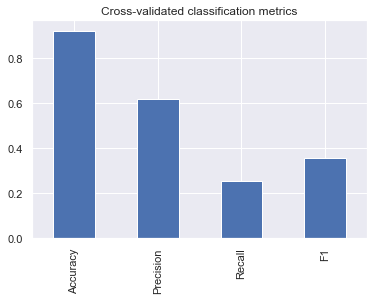

In [25]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [26]:
clf.coef_

array([[-0.15368495,  0.40952505, -0.06018191, -0.02211786,  0.2267775 ,
         0.20477375,  0.14753491,  0.09273325, -0.06780816,  0.12270357,
        -0.00991122,  0.09471625, -0.07153908, -0.07533668,  0.10086909,
        -0.07985358,  0.10566139, -0.01366651, -0.01982332,  0.00250046,
        -0.00609745, -0.00932171, -0.05522894, -0.03521682, -0.12817475,
         0.13090663, -0.0792398 , -0.08553048,  0.08670674, -0.16723258,
        -0.21161598,  0.03881207, -0.11764969,  0.11541972,  0.00784655,
         0.10803504,  0.12453622,  0.09503863, -0.04561367,  0.20112867,
        -0.14843667, -0.02142569,  0.14723481, -0.10329715,  0.13892795,
         0.03302524, -0.08338686,  0.02489395, -0.02645494, -0.1298138 ,
        -0.12554344,  0.11475362, -0.05529659,  0.00500083, -0.22817525,
        -0.03267956,  0.00838775,  0.17438344,  0.06059511, -0.1707361 ,
        -0.17585595]])

In [27]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.15368494730697996,
 'bmi': 0.4095250538486997,
 'elective_surgery': -0.06018191471024616,
 'height': -0.02211786408295707,
 'icu_admit_source': 0.2267774952197602,
 'icu_id': 0.20477375356947597,
 'pre_icu_los_days': 0.1475349118960125,
 'weight': 0.09273324600700203,
 'apache_2_diagnosis': -0.06780815582001581,
 'apache_3j_diagnosis': 0.12270357285599859,
 'apache_post_operative': -0.0099112212902629,
 'arf_apache': 0.09471625143642938,
 'gcs_eyes_apache': -0.07153907566785643,
 'gcs_motor_apache': -0.07533668197477993,
 'gcs_unable_apache': 0.10086908774295117,
 'gcs_verbal_apache': -0.07985358338767141,
 'heart_rate_apache': 0.10566138970531215,
 'intubated_apache': -0.013666506369110699,
 'map_apache': -0.019823321200199952,
 'resprate_apache': 0.0025004553072592163,
 'temp_apache': -0.0060974516356146384,
 'ventilated_apache': -0.009321711364424636,
 'd1_diasbp_max': -0.05522894471197572,
 'd1_diasbp_min': -0.035216817729119,
 'd1_diasbp_noninvasive_max': -0.12817475318

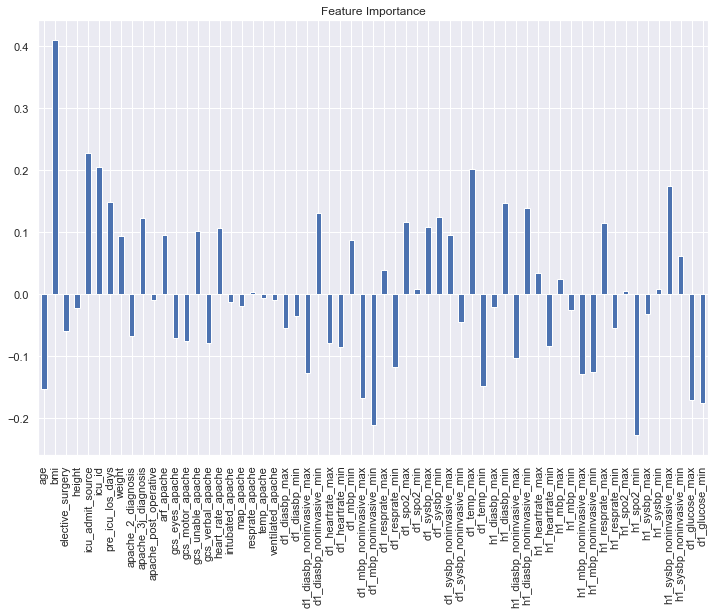

In [28]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(figsize=(12, 8), kind = "bar", title="Feature Importance", legend=False);